### 복습

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import sys

In [3]:
src = cv2.imread('./fig/ch2_fig/airplane.bmp')
mask = cv2.imread('./fig/ch2_fig/mask_plane.bmp', cv2.IMREAD_GRAYSCALE) # 비행기가 1, 1(white), 0(black)
dst = cv2.imread('./fig/ch2_fig/field.bmp')

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
img = cv2.imread('./fig/ch2_fig/puppy.bmp')
img2 = img[100:300, 200:500].copy()
img3 = img[100:300, 200:500]

cv2.circle(img3, (100,100), 50, (255,0,0), 3, cv2.LINE_AA)


cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)


cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
img1 = np.zeros((400, 600, 3), np.uint8)
img2 = np.ones((400, 600, 3), np.uint8) * 255
img3 = np.full((400, 600, 3), (123, 233, 16), np.uint8)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)

cv2.waitKey()
cv2.destroyAllWindows()


In [19]:
img = cv2.imread('./fig/ch2_fig/puppy.bmp', 0) # 0으로 쓰면 grayscale, 1으로 쓰면 color

h, w = img.shape[:2] # 세로, 가로 값 리턴
print(h, w)

cv2.imshow('img', img)

while True:
    key = cv2.waitKey()
    if key == 27 or key == ord('q'):
        break
    cv2.destroyAllWindows()

480 640


In [21]:
img_lists = glob.glob('./fig/images/*.*')
# print(img_lists)

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_lists[idx])
    
    if img is None:
        break

    cv2.imshow('scene', img)
    
    if cv2.waitKey(2000) == ord('q'):
        break

    idx += 1
    if idx >= len(img_lists):
        idx = 0
    
cv2.destroyAllWindows()


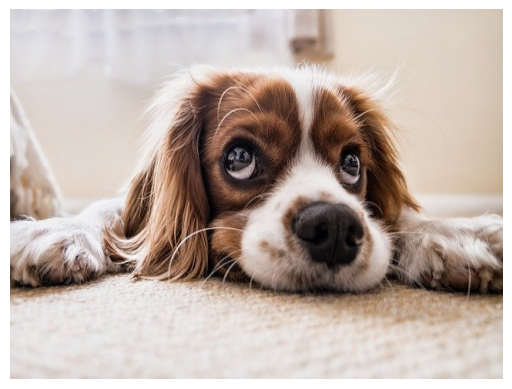

In [25]:
imgBGR = cv2.imread('./fig/ch2_fig/puppy.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.axis('off')
plt.show()

In [26]:
img = cv2.imread('./fig/ch2_fig/puppy.bmp')

if img is None:
    print('img read failed')
    sys.exit()

img_re = cv2.resize(img, (200, 100), interpolation=cv2.INTER_AREA) # 줄어들 때는 cv2.INTER_AREA
cv2.imwrite('./img_resize.png', img_re)

cv2.imshow('img', img)
cv2.imshow('img_re', img_re)

cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
src = cv2.imread('./fig/ch2_fig/cow.png')
dst = cv2.imread('./fig/ch2_fig/green.png')
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(src_gray, 240, 255, cv2.THRESH_BINARY_INV)

h, w = src.shape[:2]
crop = dst[400:400+h, 500:500+w]

cv2.copyTo(src,mask,crop)

# cv2.imshow('src', src)
# cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 알파 채널 이용하기

In [114]:
src = cv2.imread('./fig/ch2_fig/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)
src = cv2.resize(src,(300, 150))

src_img = src[:,:,:-1] # 알파채널 빼고 읽기
src_mask = src[:,:,-1] # 알파채널만 읽기


puppy = cv2.imread('./fig/ch2_fig/puppy.bmp')
h, w = src.shape[:2]
crop = puppy[120:120+h, 220:220+w]

crop[src_mask >0]=(0,0,255)

cv2.copyTo(src_img,src_mask,crop)

# cv2.imshow('src',src)
# cv2.imshow('src_img',src_img)
# cv2.imshow('src_mask',src_mask)

cv2.imshow('puppy', puppy)

cv2.waitKey()
cv2.destroyAllWindows()

In [240]:
src = cv2.imread('./fig/ch2_fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)
# print(src.shape)
src = cv2.resize(src,(250, 180))

src_img = src[:,:,:-1] # 알파채널 빼고 읽기
src_mask = src[:,:,-1] # 알파채널만 읽기

jihoon = cv2.imread('./fig/ch2_fig/KakaoTalk_20230215_153205813.png')
h, w = src.shape[:2]
crop = jihoon[40:40+h, 160:160+w]

cv2.copyTo(src_img,src_mask,crop)

cv2.imshow('jihoon', jihoon)

cv2.waitKey()
cv2.destroyAllWindows()

### 그리기(직선, 원 등)

In [318]:
img = np.full((600,1200,3), (255,255,255), np.uint8)

# cv2.line(img,(100,100),(100,200),(255,0,0), 3, cv2.LINE_4)
# cv2.line(img,(100,100),(200,100),(0,255,0), 3, cv2.LINE_4)
# cv2.line(img,(200,100),(200,200),(0,0,255), 3, cv2.LINE_4)

cv2.line(img,(100,30), (300,30), (0,0,255), 3, cv2.LINE_8)
cv2.line(img,(300,30), (200,300), (0,0,255), 3, cv2.LINE_AA)
cv2.arrowedLine(img, (400, 30), (400, 300), (255,0,0), cv2.LINE_8)

cv2.rectangle(img, (150,400), (400, 600), (0,0,255),3) # 사각형 1
cv2.rectangle(img, (194, 434, 158,129), (255,0,0),-1) # 사각형 2

cv2.circle(img, (800,300),50,(255,100,100), -1) # 원형

cv2.ellipse(img, (800,300),(100,50),20,0,270,(120,120,120), 10, cv2.LINE_AA) # 타원형

cv2.putText(img, 'go home', (800, 200),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 2, (33,33,33), 2, cv2.LINE_AA)

x_pos, y_pos, width, height = cv2.selectROI('location', img, False)
print(f'x좌표: {x_pos}, y좌표: {y_pos}, 가로: {width}, 세로: {height}')



cv2.imshow('img',img)

cv2.waitKey()
cv2.destroyAllWindows()

In [473]:
img = np.full((600,1200,3), (255,255,255), np.uint8)

cv2.circle(img, (500,200),50,(255,100,100), 1) # 원형
cv2.line(img,(600,150),(600,250),(255,100,100), 1, cv2.LINE_4)
cv2.line(img,(450,250),(450,350),(255,100,100), 1, cv2.LINE_4)
cv2.line(img,(450,350),(600,350),(255,100,100), 1, cv2.LINE_4)

cv2.line(img,(800,150),(750,250),(255,100,100), 1, cv2.LINE_4)
cv2.line(img,(800,150),(850,250),(255,100,100), 1, cv2.LINE_4)
cv2.line(img,(900,150),(900,250),(255,100,100), 1, cv2.LINE_4)
cv2.line(img,(900,200),(950,200),(255,100,100), 1, cv2.LINE_4)
cv2.rectangle(img, (748, 261, 159,87), (255,100,100), 1) # 사각형 2

cv2.imshow('img',img)

cv2.waitKey()
cv2.destroyAllWindows()